# Lab 5 - Simulating Continuous-time ODEs and PDEs in Python

Author: Elizabeth O'Meara

Adapted from a lab written by: Steve Walker

## Exponential Growth ODE

Now that we have completed the topic of discrete time models, we move into continous time models. In these models, the rate of change of a population at each time is a function of the population at that time. The simplest example is shown below, where $x$ is a function of time.

$$
\begin{equation}
\frac{dx}{dt} = f(x) = rx
\end{equation}
$$

Since a fixed point occurs when the value of the function does not change, for these models, a fixed point occurs when $f(x^*)=rx^*= 0$. Thus, the fixed point of this model is $x^*=0$. To determine the stability of the fixed point we consider the following to ranges: $x > x^*$ and $x < x^*$. For the fixed point to be stable, when $x > x^*$, $x$ must be decreasing (i.e., $\frac{dx}{dt}<0$), when $x < x^*$, $x$ must be increasing (i.e., $\frac{dx}{dt}>0$). 

---

**Exercise 1**: For this model, when is the fixed point stable? When is it unstable?

Fixed point is stable when $r<0$ and unstable when $r>0$. 

---

Although we can simply integrate to find the explicit solution to this ODE, as the models get more complex, it is typically more convenient to solve them numerically using Python. This is accomplished using the `scipy.integrate.odeint()` function. The documentation for this function is available at the following [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint). There are several arguments that the function takes, however the most important are: `func`, `x0`, `t`, and `args`. `func` is a function that evaluates $\frac{dx}{dt}$ for `t`, `x` and `r`, `x0` is the initial condition, `t` is the time vector for which you wish to simulate the model, and `args` is a sequence of parameters required by the model, i.e., `r`. The following code simulates the solution to the described ODE for several values of `r`. 

*Note: since we only need the* `odeint` *function, we import odeint alone*

       time          x    r
0      0.00  10.000000 -0.5
1      0.01   9.950125 -0.5
2      0.02   9.900498 -0.5
3      0.03   9.851119 -0.5
4      0.04   9.801987 -0.5
...     ...        ...  ...
5995  19.95   1.360136 -0.1
5996  19.96   1.358777 -0.1
5997  19.97   1.357419 -0.1
5998  19.98   1.356062 -0.1
5999  19.99   1.354707 -0.1

[6000 rows x 3 columns]


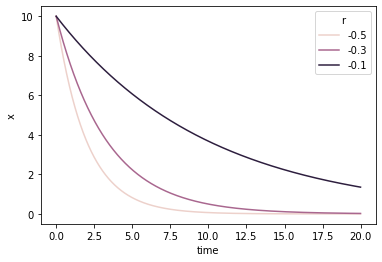

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def exp_growth(x,t,r):
    dx = r*x
    return dx

x0 = 10
r = -0.5
t = np.arange(0, 20, 0.01) ## goes from 0 to 20 by increments of 0.01
r1_rep = np.repeat(r, len(t))


x1 = odeint(exp_growth,x0,t,args=(r,))
r = -0.3
r2_rep = np.repeat(r, len(t))
x2 = odeint(exp_growth,x0,t,args=(r,))
r = -0.1
r3_rep = np.repeat(r, len(t))
x3 = odeint(exp_growth,x0,t,args=(r,))

results = np.zeros((len(x1)*3, 3))

results[:, 0] = np.transpose(np.concatenate((t, t, t)))
results[:, 1] = np.transpose(np.concatenate((x1, x2, x3)))
results[:, 2] = np.transpose(np.concatenate((r1_rep, r2_rep, r3_rep)))

df = pd.DataFrame({
    'time': results[:,0],
    'x': results[:,1],
    'r': results[:,2]
})

print(df)
sns.lineplot(data=df, x='time', y='x', hue='r');


**Exercise 2**: Solve the following ODE using `odeint`: $\frac{dx}{dt} = f(x) = rx + m$, for $r=0.5$, $m=2$ and up to $t=20$ with increments of 0.5. Plot the solution in `seaborn`.

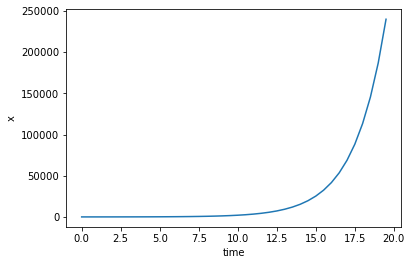

In [2]:
def affine_model(x,t,r,m):
    dx = r*x + m
    return dx

x0 = 10
r = 0.5
m = 2
t = np.arange(0, 20, 0.5)

x = odeint(affine_model, x0, t, args=(r, m))

df = pd.DataFrame({
    'time': t,
    'x': x[:,0]
})

sns.lineplot(data=df, x='time', y='x');

## A Simple Multivariate Linear Continuous Time Discrete ODE

We can also use the `odeint` function to solve a linear system of ODEs. An example is given below.

$$
\begin{align}
x' &= f_1(x,y) \\
&= x \\
y' &= f_2(x,y) \\
&= x + y
\end{align}
$$

In systems of ODEs, for ($x^*$, $y^*$) to be a fixed point, $f_1(x^*,y^*)=f_2(x^*,y^*)=0$, i.e, both derivatives have to be zero at the same time. First, we start by setting $f_1(x^*,y^*)=0$. Since $f_1(x^*,y^*)=x^*$, $x^*=0$. With this required value of $x^*$, subbing it into the equation for $f_2$, gives us, $f_2(x^*,y^*)=0 + y^*$, so $y^*=0$. Thus, the fixed point of this system is $(x^*, y^*)=(0,0)$. The stability of the fixed point will be discussed in detail in lecture. For now, we can practice solving continuous time models in Python in the code below.

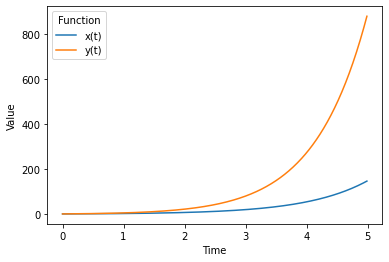

In [3]:
def model(state, t):
    x, y = state
    dxdt = x
    dydt = x + y 
    return [dxdt, dydt]

x0 = 1
y0 = 1

init_cond = [x0,y0]
t = np.arange(0, 5, 0.01)

result = odeint(model, init_cond, t)

df_x = pd.DataFrame({
    'time': t,
    'x': result[:,0]
})

df_y = pd.DataFrame({
    'time': t,
    'y': result[:,1]
})

sns.lineplot(data=df_x, x='time', y='x', label='x(t)')
sns.lineplot(data=df_y, x='time', y='y', label='y(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Function');


**Exercise 3**: Solve the following system of ODEs using `odeint`:

$$
\begin{align}
\frac{dx}{dt} &= ax + by \\
\frac{dy}{dt} &= ax - by
\end{align}
$$

For the following parameters up to $t=5$ by increments of $0.01$: 
1. $a=b=1$
2. $a=1$ and $b=2$

Plot your results in `seaborn`.

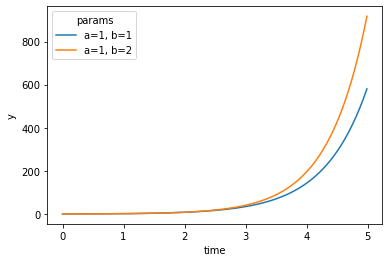

In [4]:
def example_mod(state, t, a, b):
    x, y = state
    dx = a*x + b*y
    dy = a*x - b*y
    return [dx, dy]

x0 = 1
y0 = 1
t = np.arange(0, 5, 0.01)
a = 1
b = 1

init_cond = [x0, y0]
params = (a, b)

x1 = odeint(example_mod, init_cond, t, args=params)
df1 = pd.DataFrame({
    'time': t,
    'x': x1[:,0],
    'y': x1[:,1],
    'params': 'a=1, b=1'
})

a = 1
b = 2
params = (a, b)  

x2 = odeint(example_mod, init_cond, t, args=params)
df2 = pd.DataFrame({
    'time': t,
    'x': x2[:,0],
    'y': x2[:,1],
    'params': 'a=1, b=2'
})

df = pd.concat([df1, df2], axis=0, ignore_index=True)

sns.lineplot(data = df, x='time', y='y', hue='params');


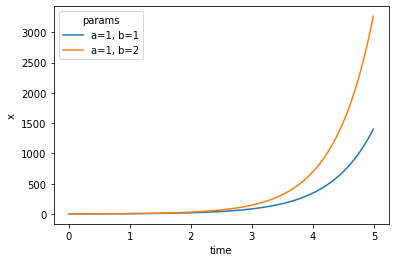

In [5]:
sns.lineplot(data = df, x='time', y='x', hue='params');

## Plotting Direction Fields in Python

A direction field is a way of graphically representing the solutions of a differential equation. In these plots, your plot has your first variable on the x axis, and your second variable on the y-axis. We use the differential equations to determine the slope of the solution for each x and y pairing. If this is not fully clear yet, do not worry. You instructor will explain this in more detail in lecture. 

However, direction fields may be soemthing you will want to include in your final projects. So in this section I show an example of how to create a direction field with a sample solution. The code is adapted from the following [post](https://waterprogramming.wordpress.com/2018/02/12/plotting-trajectories-and-direction-fields-for-a-system-of-odes-in-python/) written by Antonia Hadjimichael. Learning how to use this code will be helpful for your final projects. In the example, we plot the direction field for the following system where $a=1$ and $b=1$.

$$
\begin{align}
\frac{dx}{dt} &= ax \\
\frac{dy}{dt} &= ax-by
\end{align}
$$

First we import the libraries and/or functions we need. We must then include a line of code that prevents an error message later on. 

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

"""
This is to ignore RuntimeWarning: invalid value encountered in true_divide
I know that when my populations are zero there's some division by zero and
the resulting error terminates my function, which I want to avoid in this case.
"""
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Now we define our function that contains the differential equations, as we did before, and solve it for given parameter values and time.

In [8]:
a = 1
b = 1
 
# Define the system of ODEs
def example(X, t=0, a=1, b=1):
    x, y = X
    dx = a*x
    dy = a*x - b*y
    return ([dx, dy])

t = np.linspace(0, 10, 100)
X0 = [2, 8] 
params = (a, b)
X = integrate.odeint(example, X0, t, args=params)

Now we have to plot the direction fields. This code is more complicated, so no need to remember this, you can use it again in future homework or projects. 

First we define `xmax` and `ymax` to be the maximum axes limits. We then define the number of points we want to plot and then define our x and y ranges. 

In [9]:
# Get limits of trajectory plot
ymax = 10
xmax = 10
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

Now, using these defined ranges, we create a meshgrid using the function `np.meshgrid`. This function creates a grid of all x and y pairings for which we wish to plot an arrow representing the slope at that point. To find the slopes at each of the points in the grid, we use our function that contains the differential equations, returning the slopes at each point in the grid. Now, by definition the direction at each grid point is the hypotenuse of the x and y direction, we find the hypotenuse of each pairing and define them as `M`. 

In [10]:
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = example([X1, Y1], a, b)
# Direction at each grid point is the hypotenuse of the x direction and the
# y direction.
M = (np.hypot(DX1, DY1))

We then normalize the length of each arrow. This is optional, however it makes the plot look nicer.

In [11]:
# This is to avoid any divisions when normalizing
M[M == 0] = 1.
# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

Finally, we create the direction field with a plotted solution curve through (2,8). The quiver function plots the field of arrows using DX1 and DY1 for direction, and M for speed.

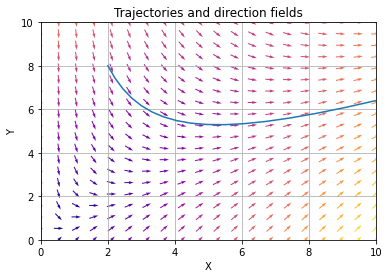

In [12]:
# Open figure
f = plt.figure()
plt.plot(X[:,0], X[:,1])
plt.title('Trajectories and direction fields')
"""
This is using the quiver function to plot the field of arrows using DX1 and
DY1 for direction and M for speed
"""
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()

**Exercise 4**: Use `odeint` to numerically solve the following system with initial conditions of $(x_0, y_0) = (0.5, 6)$.
$$
\begin{align}
\frac{dx}{dt} &= \sin(x) \\
\frac{dy}{dt} &= x-y
\end{align}
$$

In [13]:
def exercise(X, t=0):
    x, y = X
    dx = np.sin(x)
    dy = x-y
    return([dx, dy])

t = np.linspace(0, 10, 100)
X0 = [0.5, 6] 
X = integrate.odeint(exercise, X0, t)

**Exercise 5**: Create a direction field for the system in exercise 4 and include the solution from exercise 4. 
$$
\begin{align}
\frac{dx}{dt} &= \sin(x) \\
\frac{dy}{dt} &= x-y
\end{align}
$$

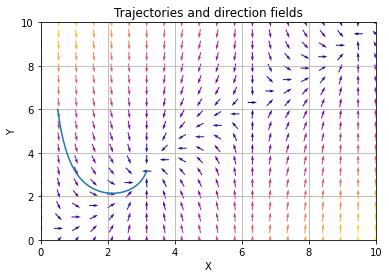

In [14]:
np.seterr(divide='ignore', invalid='ignore')
# Get limits of trajectory plot
ymax = 10
xmax = 10
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = exercise([X1, Y1])
# Direction at each grid point is the hypotenuse of the x direction and the
# y direction.
M = (np.hypot(DX1, DY1))

# This is to avoid any divisions when normalizing
M[M == 0] = 1.
# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M

# Open figure
f = plt.figure()
plt.plot(X[:,0], X[:,1])
 
plt.title('Trajectories and direction fields')
"""
This is using the quiver function to plot the field of arrows using DX1 and
DY1 for direction and M for speed
"""
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()